In [6]:
import requests, base64, json
task_id = "2226b32c-ace9-4d35-812e-29e88bea1e1"
r = requests.get(f"http://localhost:8000/task_status/{task_id}")
print(r.json())

{'detail': 'Task ID not found'}


/data/ZhouRongzhi/miniconda3/envs/qwen/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 65292 (\N{FULLWIDTH COMMA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/data/ZhouRongzhi/miniconda3/envs/qwen/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 25353 (\N{CJK UNIFIED IDEOGRAPH-6309}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/data/ZhouRongzhi/miniconda3/envs/qwen/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 38062 (\N{CJK UNIFIED IDEOGRAPH-94AE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/data/ZhouRongzhi/miniconda3/envs/qwen/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 30830 (\N{CJK UNIFIED IDEOGRAPH-786E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/data/ZhouRongzhi/miniconda3/envs/qwen/lib/python3.12/site-packages/IPython

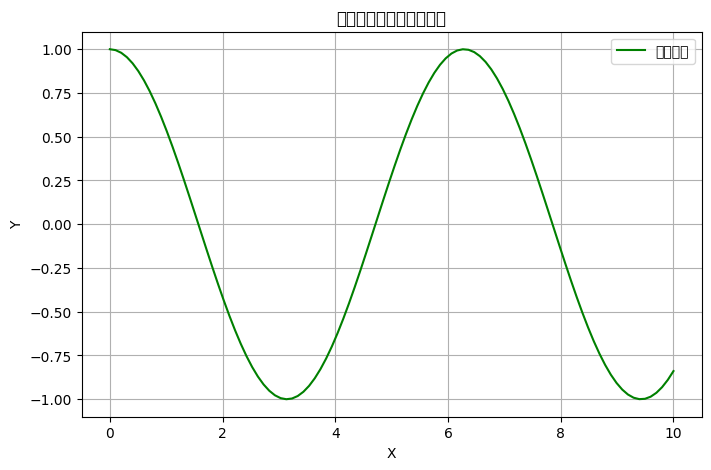

Button(description='确认选择', style=ButtonStyle())

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display

# 准备数据
x = np.linspace(0, 10, 100)
y = np.cos(x)

# 存储选中的点
points = []

# 创建图形
fig, ax = plt.subplots(figsize=(8, 5))
line, = ax.plot(x, y, 'g-', label='示例曲线')
ax.set_title('点击选点，点击按钮确认')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.grid(True)
ax.legend()

# 点击事件函数
def on_click(event):
    if event.inaxes == ax:
        xc, yc = event.xdata, event.ydata
        points.append((xc, yc))
        ax.plot(xc, yc, 'mo')  # 紫色圆点标记
        fig.canvas.draw()

# 绑定事件
cid = fig.canvas.mpl_connect('button_press_event', on_click)

# 确认按钮（点击后输出坐标）
confirm_btn = widgets.Button(description="确认选择")

def on_confirm(b):
    print("\n确认选中的点坐标：")
    for i, (x, y) in enumerate(points, 1):
        print(f"点{i}：({x:.4f}, {y:.4f})")

confirm_btn.on_click(on_confirm)

# 显示图像和按钮
plt.show()
display(confirm_btn)

In [ ]:

import numpy as np
import base64
import requests
import time

# URL endpoints
url_segment = "http://localhost:8000/segment_frame"
url_status = "http://localhost:8000/task_status"

# Frame index and video path
frame_index = 5
video_path = "../videos/output_0_mp4"

# Request data format
data = {
    "video_path": video_path,
    "frame_idx": frame_index,
    "obj_id": 1,
    "bbox": [300, 0, 500, 200],
    "conf_threshold": 0.0
}

# Function to send segmentation request
def send_segmentation_request(data):
    response = requests.post(url_segment, json=data)
    if response.status_code == 200:
        task_id = response.json().get('task_id')
        print(f"Task queued with task_id: {task_id}")
        return task_id
    else:
        print("Error while sending request:", response.json())
        return None

# Function to poll task status
def poll_task_status(task_id):
    while True:
        status_response = requests.get(f"{url_status}/{task_id}")
        status_data = status_response.json()

        if (results := status_data.get("result", None)) is not None:
            for idx, img_b64 in results.items():
                img_data = base64.b64decode(img_b64)
                with open(f"seg_result_{idx}.jpg", "wb") as f:
                    f.write(img_data)

        if status_data["status"] == "done":
            print("Task completed successfully!")
            print("Result:", status_data["result"])  # You can process the result here
            break
        elif status_data["status"] == "error":
            print("Task failed with error:", status_data["result"])
            break
        else:
            print(f"Task {task_id} is {status_data['status']}, waiting...")
            time.sleep(1)


task_id = send_segmentation_request(data)
if task_id is not None:
    poll_task_status(task_id)

Task queued with task_id: 448ad25f-babb-4b18-9830-2bf9ef81ead2
Task 448ad25f-babb-4b18-9830-2bf9ef81ead2 is processing, waiting...
Task 448ad25f-babb-4b18-9830-2bf9ef81ead2 is processing, waiting...
Task 448ad25f-babb-4b18-9830-2bf9ef81ead2 is processing, waiting...
Task completed successfully!
Result: {'5': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFoAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVV

### 单帧接口

In [ ]:
import requests
import time

url_segment = "http://localhost:8000/segment_frame"
url_status = "http://localhost:8000/task_status"

frame_index = 5
data = {
    "video_path": "../videos/output_0_mp4",
    "frame_idx": frame_index,
    "obj_id": 1,
    "bbox": [300, 0, 500, 240],
    "conf_threshold": 0.0
}

# Step 1: Send the segmentation request and get the task_id
response = requests.post(url_segment, json=data)
if response.status_code == 200:
    task_id = response.json().get('task_id')
    print(f"Task queued with task_id: {task_id}")
else:
    print("Error while sending request:", response.json())
    exit(1)

# Step 2: Poll for the task status
while True:
    status_response = requests.get(f"{url_status}/{task_id}")
    status_data = status_response.json()

    if (results := status_data.get("result", None)) is not None:
        for idx, img_b64 in results.items():
            img_data = base64.b64decode(img_b64)
            with open(f"seg_result_{idx}.jpg", "wb") as f:
                f.write(img_data)

    if status_data["status"] == "done":
        print("Task completed successfully!")
        print("Result:", status_data["result"])  # You can process the result here
        break
    elif status_data["status"] == "error":
        print("Task failed with error:", status_data["result"])
        break
    else:
        print(f"Task {task_id} is {status_data['status']}, waiting...")
        time.sleep(1)


Task queued with task_id: 2bedf0da-5438-4386-9c5e-cdf8cf18e4fe
status_data:  {'status': 'processing', 'task_id': '2bedf0da-5438-4386-9c5e-cdf8cf18e4fe'}
Task 2bedf0da-5438-4386-9c5e-cdf8cf18e4fe is processing, waiting...
status_data:  {'status': 'processing', 'task_id': '2bedf0da-5438-4386-9c5e-cdf8cf18e4fe'}
Task 2bedf0da-5438-4386-9c5e-cdf8cf18e4fe is processing, waiting...
status_data:  {'status': 'processing', 'task_id': '2bedf0da-5438-4386-9c5e-cdf8cf18e4fe'}
Task 2bedf0da-5438-4386-9c5e-cdf8cf18e4fe is processing, waiting...
status_data:  {'status': 'done', 'result': {'5': '/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAFoAoADASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZna

### 批量帧接口

In [ ]:
url = "http://localhost:8000/segment_frames"
data = {
    "video_path": "./videos/bedroom.mp4",
    "frame_indices": [0, 5, 10, 15],
    "bbox": [300, 0, 500, 400],
    "conf_threshold": 0.0
}

r = requests.post(url, json=data)
results = r.json()["results"]
for idx, img_b64 in results.items():
    img_data = base64.b64decode(img_b64)
    with open(f"seg_result_{idx}.jpg", "wb") as f:
        f.write(img_data)
